# Problem 11, Chapter 7

In chapter 7, question 11 a classic kinetics question: can you obtain the reaction order and the rate constant from conc. vs. time data for a reaction? Let's go!

<img src="p11.png" width=800 class=center />

## The Data

First we will create a dataframe from the textbook data. You have seen this done using a matrix or a dictionary of data series  as input into the `Pandas.DataFrame()` function. What is your favourite way?

I will create a dictionary where I use a column heading as a key and the data series as the value in a key:value pair within a dictionary. The code below will take the above data as two series: 'time' and 'conc'. I will arrange them within the same dictionary and then convert this to a dataframe. Perhaps you might ask why bother? The dictionary alone would be used, or I could just use the two data series directly. That is all true.

The benefit of using a dataframe is the many tools available in *Pandas* for manipulating this object. I don't really need a laser to shave, but I use one anyway. It's called freedom.


In [6]:
#######################
### import packages ###
#######################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

path = "https://raw.githubusercontent.com/blinkletter/StealThisBook/main/6_PhysOrgExamples/"


#######################
### Create data set ###
#######################

dict = {}

key = "time"
value = [0, 600, 1200, 1800, 2400, 3000, 3600]
dict[key] = value

key = "conc"
value = [0.0165, 0.0124, .0093, 0.0071, 0.0053, 0.0039, 0.0029]
dict[key] = value
#print(dict)

df = pd.DataFrame(dict)
display(df)


,time,conc
0,0,0.0165
1,600,0.0124
2,1200,0.0093
3,1800,0.0071
4,2400,0.0053
5,3000,0.0039
6,3600,0.0029


## Determining Reaction Order

We can determine reaction order by applying the linearized version of the $1^{st}$ and $2^{nd}$-order integrated rate equations

| Reaction | Order | Rate Law | Integrated Law | Linear Form |
| :--: | :--: | :--: | :--: | :--: |
| $${A}\xrightarrow{k_{obs}}{P}$$ | 1 | $$-\frac{\partial A}{\partial t}  = k_{obs}\cdot A$$ | $$ A_t = A_0 \cdot e^{-k_{obs}t}$$ | $$ \ln{A_t}  = \ln{A_t} - k\cdot t$$ | 
| $${2A}\xrightarrow{k_{obs}}{P}$$ | 2 | $$-\frac{\partial A}{\partial t} = k_{obs}\cdot A^2$$ | $$ \frac{1}{A_t} = \frac{1}{A_0} + k_{obs}\cdot t$$ | $$ \frac{1}{A_t} = \frac{1}{A_0} + k_{obs}\cdot t$$ |

I expect this to be a first order reaction because both reactions that consume the reactant are first order. Let us plot the two linear models and see if that is indeed the case.

We will plot $\ln{A_t}$ vs. $t$ and $\frac{1}{\left[ A_t \right]}$ vs. $t$.

As a bonus, the code below will show you how to make two plots within a figure. I stole it all from the [second page](6_2_kinetics.ipynb) of this book and changed some small bits to reflect the different header names in the dataframe. Never reinvent the wheel. 



,time,conc
0,0,0.0165
1,600,0.0124
2,1200,0.0093


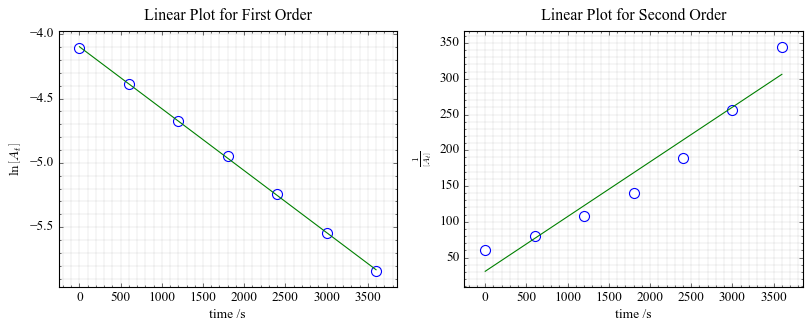

The reaction is first order with a rate constant of 4.82e-04 +/- 7.4e-06 s^-1 


In [14]:
#######################
### import packages ###
#######################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


#####################
### Load data set ###
#####################

display(df.head(3))                # Show header and first three lines of dataframe


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(path + "S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))  
ax[0].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   
ax[1].margins(x=.07, y=.07, tight=True)                     # add 7% empty space around outside of plot area   


#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

ReciprocalA = 1/df["conc"]
lnA = np.log(df["conc"])
t = df["time"]


#########################################
### The first plot is in position 0.  ###
### ax[0] addresses that plot.        ###
#########################################

ax[0].plot(t, lnA, "o")
ax[0].set(title="Linear Plot for First Order",       
          ylabel=r"$\ln{\left[ A_t \right]}$", 
          xlabel="time /s",                
#          xlim=[0,100],                  
#          ylim=[-1,7]
         )

### Linear line fit and plot the line fit ###

linfit1 = linregress(t, lnA)
fity = linfit1.slope*t + linfit1.intercept
ax[0].plot(t, fity, "-")


##########################################
### The second plot is in position 0.  ###
### ax[0] addresses that plot.         ###
##########################################

ax[1].plot(t, ReciprocalA, "o")
ax[1].set(title="Linear Plot for Second Order",       
          ylabel=r"$\frac{1}{\left[ A_t \right]}$", 
          xlabel="time /s",                
#          xlim=[0,100],                  
#          ylim=[-1,7]
         )

### Linear line fit and plot the line fit ###

linfit2 = linregress(t, ReciprocalA)
fity=linfit2.slope*t+linfit2.intercept
ax[1].plot(t, fity, "-")

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined four plots


################################################
### Print out the calculated rate constants  ###
################################################

k = -linfit1.slope 
 
print(f"The reaction is first order with a rate constant of \
{k:0.2e} +/- {2*linfit1.stderr:0.1e} s^-1 ")   # 2 * stderr = 95% confidence interval



## Observations

I should probably plot the residuals but I won't because this looks like a slam dunk to me.  The data fits the first-order model with a rate constant of $4.82 \pm 0.07 \times 10^{-4}~s^{-1}$

Since the code used above is already written, I can solve problems like this almost as fast as I can ype in the data set. These notebooks can become useful tools that can be used again and again.